In [1]:
import numpy as np 
import pandas as pd 
import os
from glob import glob
import matplotlib.pyplot as plt
from tensorflow import keras

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential

from tensorflow.keras.applications.vgg19 import VGG19

In [2]:
path_1 = "F:/SkinDisease/newdata/Dermnet/Train"
path_2 = "F:/SkinDisease/newdata/Dermnet/Valid"
train_path = os.listdir(path_1)
test_path = os.listdir(path_2)

In [3]:
len(train_path)

10

In [4]:
SIZE = [224, 224]

In [5]:
vgg19 = VGG19(input_shape=SIZE + [3], weights="imagenet", include_top=False)

In [6]:
for layer in vgg19.layers:
    layer.trainable = False

In [7]:
x = Flatten()(vgg19.output)

In [8]:
prediction = Dense(len(train_path), activation="softmax")(x)

model = Model(inputs=vgg19.input, outputs=prediction)

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [11]:
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
trainset = train_datagen.flow_from_directory( "F:/SkinDisease/newdata/Dermnet/Train",
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode="categorical", shuffle=True)

Found 26642 images belonging to 10 classes.


In [13]:
testset = test_datagen.flow_from_directory("F:/SkinDisease/newdata/Dermnet/Valid",
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode="categorical", shuffle=False)

Found 2389 images belonging to 10 classes.


In [ ]:
import tensorflow as tf
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)

x = model.fit(trainset,
            validation_data=testset,
            epochs=100,
            steps_per_epoch=len(trainset),
            validation_steps=len(testset),
            callbacks=[callback]
            )

Epoch 1/100
833/833 [==============================] - 5946s 7s/step - loss: 1.5455 - accuracy: 0.4929 - val_loss: 1.9778 - val_accuracy: 0.3797
Epoch 2/100
833/833 [==============================] - 5606s 7s/step - loss: 1.1152 - accuracy: 0.6233 - val_loss: 1.5595 - val_accuracy: 0.4889
Epoch 3/100
833/833 [==============================] - 6180s 7s/step - loss: 0.9383 - accuracy: 0.6841 - val_loss: 1.3688 - val_accuracy: 0.5345
Epoch 4/100
833/833 [==============================] - 5749s 7s/step - loss: 0.8068 - accuracy: 0.7294 - val_loss: 1.7271 - val_accuracy: 0.5241
Epoch 5/100
833/833 [==============================] - 6189s 7s/step - loss: 0.7345 - accuracy: 0.7520 - val_loss: 1.5121 - val_accuracy: 0.5684
Epoch 6/100
833/833 [==============================] - 5954s 7s/step - loss: 0.6758 - accuracy: 0.7710 - val_loss: 1.2466 - val_accuracy: 0.6584
Epoch 7/100
833/833 [==============================] - 5318s 6s/step - loss: 0.6061 - accuracy: 0.8016 - val_loss: 1.2195 - val_ac

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model.predict(testset)
y_pred = np.argmax(y_pred, axis=1)
y_true = testset.classes

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))
print("\nClassification Report:")
print(classification_report(y_true, y_pred))
print("\nAccuracy:", accuracy_score(y_true, y_pred))

In [ ]:
model.save("vgg19_dermet_model_32.h5")

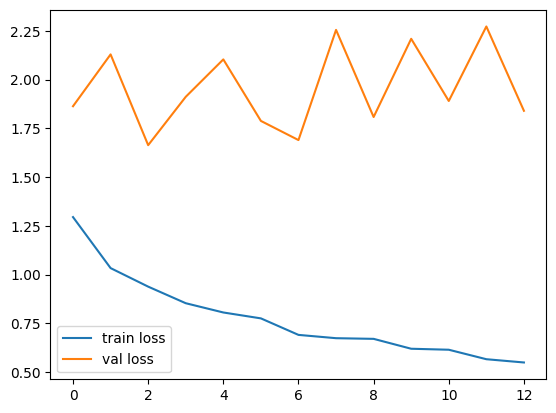

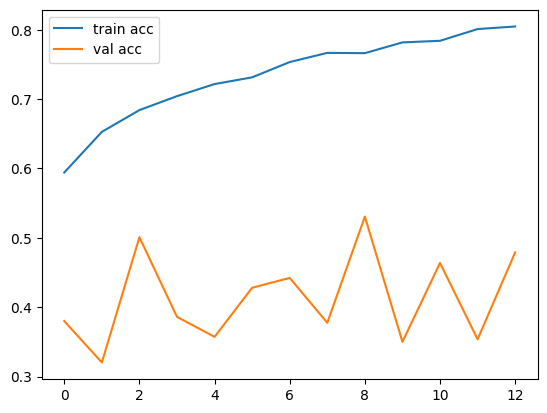

<Figure size 640x480 with 0 Axes>

In [18]:
# plot the loss
plt.plot(x.history['loss'], label='train loss')
plt.plot(x.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(x.history['accuracy'], label='train acc')
plt.plot(x.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [19]:
import tensorflow as tf

In [20]:
model = tf.keras.models.load_model("vgg19_melanoma_model_32.h5")

In [21]:
y_pred = model.predict(testset)
y_pred = np.argmax(y_pred, axis=1)
y_true = testset.classes

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))
print("\nClassification Report:")
print(classification_report(y_true, y_pred))
print("\nAccuracy:", accuracy_score(y_true, y_pred))

238/238 [==============================] - 1471s 6s/step
Confusion Matrix:
[[  30  128   21    0   56   12   14    0]
 [   8  680   26    0  139   85   51    8]
 [  17  232   80    0  318  100   38    3]
 [   0   43    0    1   11   12    5    0]
 [  10  137   28    0  994  161   26    1]
 [   6  565   85    0 1348 1792   49   18]
 [   4   81    5    0   42    9   46    2]
 [   0   17    3    0   14   21    2   19]]

Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.11      0.18       261
           1       0.36      0.68      0.47       997
           2       0.32      0.10      0.15       788
           3       1.00      0.01      0.03        72
           4       0.34      0.73      0.46      1357
           5       0.82      0.46      0.59      3863
           6       0.20      0.24      0.22       189
           8       0.37      0.25      0.30        76

    accuracy                           0.48      7603
   macro avg  

In [ ]:
model.summary()

In [ ]:
# import matplotlib.pyplot as plt

In [ ]:
# # plot the loss
# plt.plot(r.history['loss'], label='train loss')
# plt.plot(r.history['val_loss'], label='val loss')
# plt.legend()
# plt.show()
# plt.savefig('LossVal_loss')

# # plot the accuracy
# plt.plot(r.history['accuracy'], label='train acc')
# plt.plot(r.history['val_accuracy'], label='val acc')
# plt.legend()
# plt.show()
# plt.savefig('AccVal_acc')

In [ ]:
# y_pred = model.predict(testset)
# y_pred = np.argmax(y_pred, axis=1)
# y_pred

In [ ]:
# model.save("vgg19_model.model")

In [ ]:
# def prepare_image(filepath):
#     img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
#     img_array = img_array / 255
#     new_array = cv2.resize(img_array, (128, 128))
#     return new_array.reshape(-1, 128, 128, 3)

# model = tf.keras.models.load_model("vgg19_model.model")

In [ ]:
# class_dict = trainset.class_indices
# class_dict

In [ ]:
# def prediction_cls(prediction):
#     for key, clss in class_dict.items():
#         if np.argmax(prediction) == clss:
#             label = key.split("___")[1]
#             label = label.replace('_'," ")
#             return label

In [ ]:
# prediction = model.predict([prepare_image("C:/Users/Rajat/Documents/Tomato/Tomato/Plant_Diseases_Dataset/Testing/0f7a2408-9c26-4ff9-bee5-2bfcd91a11f7___RS_Erly.B 9440.JPG")])
# prediction_cls(prediction)

In [ ]:
# # import required module
# import glob
# from matplotlib import pyplot as plt
# from matplotlib import image as mpimg

# # get the path/directory
# folder_dir = "C:/Users/Rajat/Desktop/Testing/"
# cnt = 0

# # iterate over files in
# # that directory
# for images in glob.iglob(f'{folder_dir}/*'):
#     cnt=cnt+1

#     # check if the image ends with png
# #     if (images.endswith(".JPG")):
# #         print(images)

#     prediction = model.predict([prepare_image(images)])
#     x = prediction_cls(prediction)
#     plt.title(x)
# #     plt.xlabel("X pixel scaling")
# #     plt.ylabel("Y pixels scaling")
 
#     image = mpimg.imread(images)
#     plt.imshow(image)
#     plt.show()

In [ ]:
# print(cnt)

In [ ]:
# model.save("vgg19_model.model")

In [ ]:
# import tensorflow as tf

In [ ]:
# model_new = tf.keras.models.load_model("vgg19_model.h5")

In [ ]:
# model_new.summary()